#Libraries, directory and data


In [ ]:
#Directory
%cd /content/drive/MyDrive/Business Analyst/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course-20240627T190637Z-001/Business Analyst course/Econometrics and Causal Inference/Matching


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Install libraby
!pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss      # for statistical testing
from causalinference import CausalModel

In [ ]:
df = pd.read_csv('school.csv')
df.head(2)

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378


In [ ]:
# df = df.drop(columns = 'childid')
df = df.iloc[:, 1:]
df.head(2)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378


#data analysis

In [ ]:
#compare the mean of both groups   catholic and non catholic
dfN = df.select_dtypes(include=[np.number])
dfN.groupby('catholic').mean()

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [ ]:
#t test
group1 = dfN.where(dfN.catholic == 0).dropna().income
group2 = dfN.where(dfN.catholic == 1).dropna().income

#using library
stats, p = ss.ttest_ind(group1, group2)
print(p)


5.943636213205364e-41


In [ ]:
# when this value is so small . that means there is a difference in the mean of both groups
# means the income from student in the catholic school is statistically different from othe other group.
# we will exclude the binary variable column, because this works with continuous variable    so remove poverty , food_stamps

In [ ]:
#for loop of t test
#get the continuos variable
continuous = ['number_places_lived', 'mom_age', 'dad_age', 'mom_score', 'dad_score', 'income']

#storing results
stat = {}
p = {}

for x in continuous:
  group1 = dfN.where(dfN.catholic == 0).dropna()[x]
  group2 = dfN.where(dfN.catholic == 1).dropna()[x]
  stat[x], p[x] = ss.ttest_ind(group1, group2)

ttest = pd.DataFrame.from_dict(p, orient = 'Index')
ttest.columns = ['pvalue']
print(ttest)

#p value is very very low  hence both groups are statistically different
#hence we cannot compare one with the another

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [ ]:
#Chi-square test
#  to test if there is a relationship between binary type value columns
tab = pd.crosstab(index = dfN.poverty,
                  columns = dfN.catholic)
stat, p, dof, exp = ss.chi2_contingency(tab)
p

6.511354893726035e-17

In [ ]:
# it is less than

In [ ]:
#chi2 loop
categorical = ['poverty', 'food_stamps']

#where to store
p = {}

#loop
for y in categorical:
  tab = pd.crosstab(index = dfN[y], columns = dfN.catholic)
  p[y] = ss.chi2_contingency(tab)[1]


chi2 = pd.DataFrame.from_dict(p, orient = 'Index')
chi2.columns = ['pvalue']
print(chi2)


                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


In [ ]:
#  very very small value which means that there is very very close relationship between poverty and the catholic variable and same thing with the food_stamp
# means one depends on the another, means they are connected. therefore both grups are not comparable at all.


#Data preparation

In [ ]:
df
#get_dummies is used to only include numberical values as it is used in machine learning concepts
# but here i already included only numerical values by .astype(int)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.50,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.50,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.50,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.50,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.50,150000.5,0,0,2.595699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,0,0,-1.240279
5425,0,"HISPANIC, RACE SPECIFIED",1,47,48,BACHELOR'S DEGREE,HIGH SCHOOL DIPLOMA/EQUIVALENT,38.18,53.50,87500.5,0,0,0.747042
5426,0,"WHITE, NON-HISPANIC",1,39,38,SOME COLLEGE,BACHELOR'S DEGREE,61.56,35.78,87500.5,0,0,0.235929
5427,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,0,0,-1.095540


In [ ]:
print(pd.get_dummies(df))
print(df.shape)

      catholic  number_places_lived  mom_age  dad_age  mom_score  dad_score  \
0            0                    1       47       45      53.50      77.50   
1            0                    1       41       48      34.95      53.50   
2            0                    1       43       55      63.43      53.50   
3            1                    1       38       39      53.50      53.50   
4            0                    1       47       57      61.56      77.50   
...        ...                  ...      ...      ...        ...        ...   
5424         0                    1       30       32      38.18      34.95   
5425         0                    1       47       48      38.18      53.50   
5426         0                    1       39       38      61.56      35.78   
5427         0                    1       30       32      38.18      34.95   
5428         0                    2       33       33      38.18      48.69   

        income  poverty  food_stamps  score_standar

In [ ]:
#Race variable
df.race.value_counts()



race
WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: count, dtype: int64

In [ ]:
#Transforming race variable      adding new columns
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') | (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)
df.head(6000)



,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.50,62500.5,0,0,0.981753,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.50,45000.5,0,0,0.594378,1,0,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.50,62500.5,0,0,0.490611,1,0,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.50,87500.5,0,0,1.451278,1,0,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.50,150000.5,0,0,2.595699,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,0,0,-1.240279,0,1,0,0
5425,0,"HISPANIC, RACE SPECIFIED",1,47,48,BACHELOR'S DEGREE,HIGH SCHOOL DIPLOMA/EQUIVALENT,38.18,53.50,87500.5,0,0,0.747042,0,1,0,0
5426,0,"WHITE, NON-HISPANIC",1,39,38,SOME COLLEGE,BACHELOR'S DEGREE,61.56,35.78,87500.5,0,0,0.235929,1,0,0,0
5427,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,0,0,-1.095540,0,1,0,0


In [ ]:
print(df.dad_education.value_counts())
df.mom_education.value_counts()

dad_education
HIGH SCHOOL DIPLOMA/EQUIVALENT            1524
SOME COLLEGE                              1344
BACHELOR'S DEGREE                         1026
9TH - 12TH GRADE                           355
MASTER'S DEGREE (MA, MS)                   354
VOC/TECH PROGRAM                           306
DOCTORATE OR PROFESSIONAL DEGREE           224
8TH GRADE OR BELOW                         167
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     129
Name: count, dtype: int64


mom_education
SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: count, dtype: int64

In [ ]:
#Transforming education variable
# dad higher education
df['dad_higher_education'] = np.where((df.dad_education == 'BACHELOR\'S DEGREE') |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)

#mom higher education
df['mom_higher_education'] = np.where((df.mom_education == 'BACHELOR\'S DEGREE') |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)


#dad secondary education
df['dad_secondary_education'] = np.where((df.dad_education == 'HIGH SCHOOL DIPLOMA/EQUIVALENT') |
                                         (df.dad_education == "9TH - 12TH GRADE ") |
                                         (df.dad_education == "8TH GRADE OR BELOW") |
                                         (df.dad_education == "VOC/TECH PROGRAM") |
                                         (df.dad_education == "GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE") |
                                         (df.dad_education == "SOME COLLEGE"),
                                         1, 0)

#mom secondary education
df['mom_secondary_education'] = np.where((df.mom_education == 'HIGH SCHOOL DIPLOMA/EQUIVALENT') |
                                         (df.mom_education == "9TH - 12TH GRADE ") |
                                         (df.mom_education == "8TH GRADE OR BELOW"),
                                         1, 0)

# here in higher education and secondary education , we face the dummuy variable trap.      as we can see in dad_higher_education and dad_secondary_education.  when one is 0 then other will definitely be 1 or viceversa.

In [ ]:
df

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,...,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education,dad_secondary_education,mom_secondary_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.50,62500.5,...,0,0.981753,1,0,0,0,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.50,45000.5,...,0,0.594378,1,0,0,0,1,0,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.50,62500.5,...,0,0.490611,1,0,0,0,1,0,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.50,87500.5,...,0,1.451278,1,0,0,0,1,0,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.50,150000.5,...,0,2.595699,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,...,0,-1.240279,0,1,0,0,0,0,1,1
5425,0,"HISPANIC, RACE SPECIFIED",1,47,48,BACHELOR'S DEGREE,HIGH SCHOOL DIPLOMA/EQUIVALENT,38.18,53.50,87500.5,...,0,0.747042,0,1,0,0,1,0,0,1
5426,0,"WHITE, NON-HISPANIC",1,39,38,SOME COLLEGE,BACHELOR'S DEGREE,61.56,35.78,87500.5,...,0,0.235929,1,0,0,0,0,1,1,0
5427,0,"HISPANIC, RACE SPECIFIED",1,30,32,HIGH SCHOOL DIPLOMA/EQUIVALENT,8TH GRADE OR BELOW,38.18,34.95,62500.5,...,0,-1.095540,0,1,0,0,0,0,1,1


In [ ]:
# clean the df
# race, dad_education, mom_education have been transformed into anotehr column (form )   so they must be removed
df = df.drop(columns = ["race", "dad_education", "mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education,dad_secondary_education,mom_secondary_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0,0,0


In [ ]:
# Isolate confounders, treat, y
treat = df.catholic.values
# print(treat)
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized"]).values

#Common support region

In [ ]:
# 3 step approach
# 1  we need the list of confounders
# 2 we need a logistic regression
# 3 we need to visualize the probabilities

# we have a list of confounders

In [ ]:
# logistic regression
# independent variables(X) is confounders and dep(Y) is treatment
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.428527
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5412
Method:                           MLE   Df Model:                           16
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                 0.06424
Time:                        20:04:57   Log-Likelihood:                -2326.5
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 2.394e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0050      0.492    -10.164      0.000      -5.970      -4.040
x1            -0.1746      0.

In [ ]:
# predictions     probability of someone being treated or not
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26827464, 0.18787221, 0.25401994, ..., 0.23724713, 0.11431253,
       0.20675446])

In [ ]:
#build object with treat probabilities
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26827464],
       [0.        , 0.18787221],
       [0.        , 0.25401994],
       ...,
       [0.        , 0.23724713],
       [0.        , 0.11431253],
       [0.        , 0.20675446]])

In [ ]:
# split between treated and non_treated     0 and 1
non_treated = df_prob[:, 0] == 0         # all of the rows and zero columns
non_treated = df_prob[non_treated, 1]
print(non_treated)
# these are just the probabilites of the non treated group.

treated = df_prob[:, 0] == 1        # the only difference here is that we look when it is 1
treated = df_prob[treated, 1]
print(treated)


[0.26827464 0.18787221 0.25401994 ... 0.23724713 0.11431253 0.20675446]
[0.20797353 0.26082255 0.2197928  0.20245915 0.31883581 0.24670889
 0.14926513 0.31235335 0.16220884 0.24995362 0.26503143 0.12502506
 0.26400713 0.24486788 0.15058756 0.33878385 0.1266413  0.18580469
 0.184819   0.16383916 0.21990262 0.20871923 0.14698424 0.18061482
 0.28389695 0.14855991 0.06209275 0.28306347 0.26566661 0.11134222
 0.23541773 0.12659107 0.32119022 0.18412653 0.2289349  0.11492041
 0.17025738 0.22027433 0.12219301 0.31693059 0.23300719 0.16640492
 0.15333078 0.15256041 0.23300719 0.20762399 0.15066059 0.05290186
 0.27328027 0.28986235 0.28604968 0.14795392 0.21408794 0.29938869
 0.24727468 0.31641689 0.31801547 0.18901989 0.12148558 0.26827254
 0.26537099 0.28354025 0.33531002 0.10634913 0.17042548 0.21343836
 0.24728882 0.14978609 0.21010571 0.30126861 0.32527334 0.26556781
 0.32653113 0.44294295 0.23721524 0.15982561 0.24439073 0.26248287
 0.07542238 0.17074641 0.24840375 0.12365729 0.11156794 0

<ipython-input-36-77c2dd7cb0ac>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_treated, shade = True, color = 'red')
<ipython-input-36-77c2dd7cb0ac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated, shade = True, color = 'blue')


<Axes: ylabel='Density'>

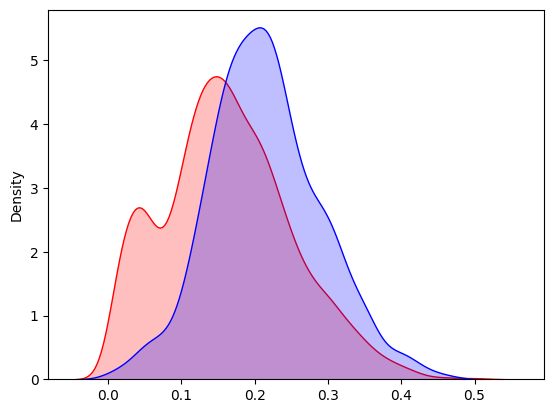

In [ ]:
# plot common support region
sns.kdeplot(non_treated, shade = True, color = 'red')
sns.kdeplot(treated, shade = True, color = 'blue')

# here we have a region that actually has a good support.  so the commonalities between both density curves, it's quite high.


#Matching


In [ ]:
#matching model
model = CausalModel(y, treat, confounders)    # always open the functin in the side tab and see its details
model.est_via_matching()
print(model.estimates)
#Se is standard error
#ATE the best treatment for us. it is average treatment effect pn the treatment    the potential effect on the people that would do something, would do the treatment.
#ATC is average treatment effect on the control group process
#ATT is effect of the treatment actually applied          it is the effect on the people that actually did it.



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.124      0.061     -2.030      0.042     -0.244     -0.004
           ATC     -0.115      0.068     -1.693      0.090     -0.247      0.018
           ATT     -0.170      0.059     -2.891      0.004     -0.286     -0.055



In [ ]:
#result
 # our ATE is -0.124 which means , for this analysis we would conclude that when comparing individuals for the catholic vs the public schools , for similar individuals, the catholic schools are the ones that went to catholic school, they perform worse than those in the public school.

In [ ]:
# p value is 0.042   less than 0.05   so statistically significant.

#Robustness check - repeated samples

In [ ]:
# 1  isolate coefficient (ATE)
model.estimates


{'matching': {'atc': -0.1147115633864192, 'att': -0.17040893011612904, 'ate': -0.12425264849576348, 'atc_se': 0.067738305019068, 'att_se': 0.05893790239093247, 'ate_se': 0.061193874658017504}}

In [ ]:
model.estimates['matching']['ate']

-0.12425264849576348

In [ ]:
# For repeated samples   we use while loop
